# Detecting Building Defects using VGG16

### Importing necessary libraries

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob

### Image Data Agumentation

In [2]:
# Use the Image Data Generator to import the images from the dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# performing data agumentation on train data

train_datagen = ImageDataGenerator( rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True 
                                  )

# performing data agumentation on test data

test_datagen = ImageDataGenerator( rescale = 1./255 )

### Loading data and performing data agumentation

In [3]:
training_set = train_datagen.flow_from_directory( '../data/train_set',
                                                     target_size = ( 224, 224 ),
                                                     batch_size = 32,
                                                     class_mode = 'categorical'
                                                )

Found 364 images belonging to 3 classes.


In [4]:
test_set = test_datagen.flow_from_directory( '../data/test_set',
                                               target_size = ( 224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical'
                                           )

Found 120 images belonging to 3 classes.


In [5]:
print( training_set.class_indices )

{'crack': 0, 'flakes': 1, 'roof': 2}


In [6]:
from collections import Counter as c

c( training_set.labels )

Counter({0: 114, 1: 189, 2: 61})

## Model Building

In [7]:
# re-size all the images 

IMAGE_SIZE = [ 224, 224 ]

train_path = 'data/train_set'
valid_path = 'data/test_set'


In [8]:
# Importing VGG16 library

vgg16 = VGG16( input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False )

In [9]:
# don't train existing weights

for layer in vgg16.layers:
    layer.trainable = False

In [10]:
folders = glob( '../data/train_set/*' )

In [11]:
folders

['../data/train_set/crack',
 '../data/train_set/flakes',
 '../data/train_set/roof']

In [12]:
x  = Flatten()( vgg16.output )

In [13]:
prediction = Dense( len(folders), activation='softmax' )(x)

# create a model object
model = Model( inputs=vgg16.input, outputs=prediction )

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Compiling the model

In [15]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

### Fit the model

In [16]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
12/12 [==============================] - 100s 8s/step - loss: 1.4285 - accuracy: 0.5027 - val_loss: 0.8909 - val_accuracy: 0.6500
Epoch 2/10
12/12 [==============================] - 101s 8s/step - loss: 0.6580 - accuracy: 0.7555 - val_loss: 0.5826 - val_accuracy: 0.7667
Epoch 3/10
12/12 [==============================] - 99s 8s/step - loss: 0.3909 - accuracy: 0.8297 - val_loss: 0.5020 - val_accuracy: 0.7667
Epoch 4/10
12/12 [==============================] - 99s 8s/step - loss: 0.3165 - accuracy: 0.8874 - val_loss: 0.5169 - val_accuracy: 0.7750
Epoch 5/10
12/12 [==============================] - 99s 8s/step - loss: 0.2388 - accuracy: 0.9231 - val_loss: 0.5611 - val_accuracy: 0.8000
Epoch 6/10
12/12 [==============================] - 100s 8s/step - loss: 0.2048 - accuracy: 0.9396 - val_loss: 0.5758 - val_accuracy: 0.8000
Epoch 7/10
12/12 [==============================] - 94s 8s/step - loss: 0.1811 - 

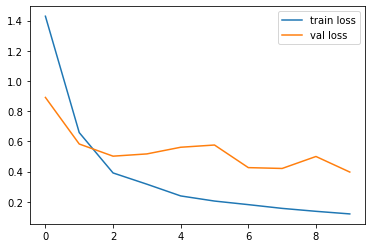

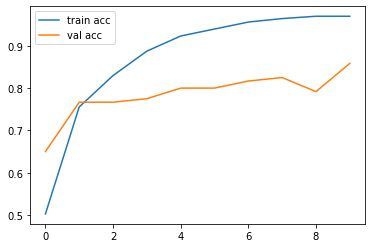

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot( r.history[ 'loss' ], label='train loss' )
plt.plot( r.history[ 'val_loss' ], label='val loss' )
plt.legend()
plt.show()
plt.savefig( 'LossVal_loss' )

# plot the accuracy
plt.plot( r.history[ 'accuracy' ], label='train acc' )
plt.plot( r.history[ 'val_accuracy' ], label='val acc' )
plt.legend()
plt.show()
plt.savefig( 'AccVal_acc' )

In [18]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save( 'building_defects_detection_vgg16_model.h5' )

In [19]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image

model = load_model( "building_defects_detection_vgg16_model.h5" ) #loading the model for testing

Using TensorFlow backend.


In [26]:
img=image.load_img( r'../data/test_set/roof/istockphoto-139879569-612x612.jpg', target_size = ( 224, 224 ) )

x=image.img_to_array( img )
x=np.expand_dims( x, axis=0 )

img_data=preprocess_input( x )

a=np.argmax( model.predict( img_data ), axis=1 )

In [27]:
a

array([2])

In [28]:
index = [ 'crack', 'flakes', 'roof']

result = index[ a[ 0 ]]

result

'roof'